In [1]:
import cv2
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import tensorflow

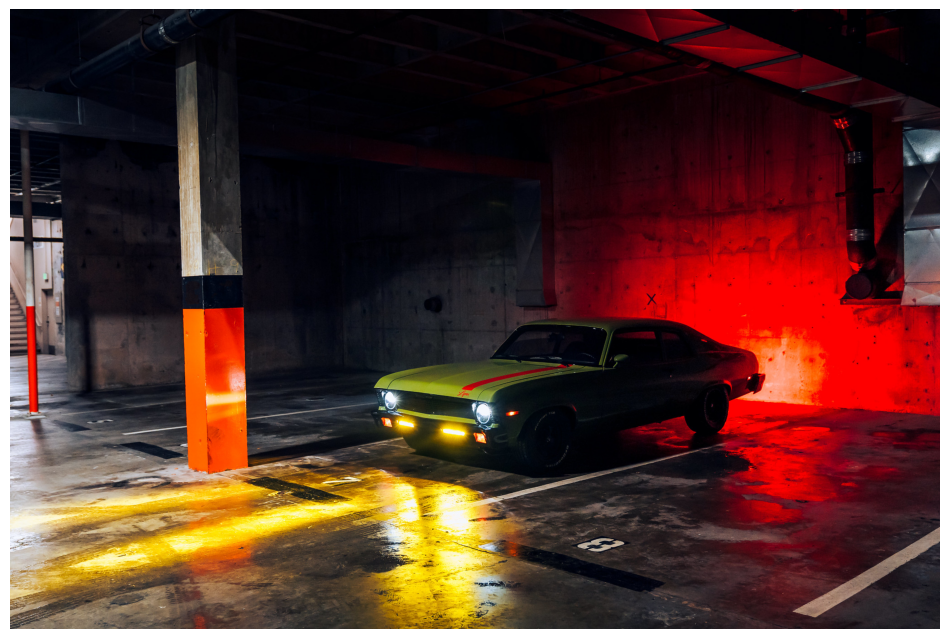

In [2]:
image = img.imread('dodge.jpg') 
plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(image)

In [3]:
# Add Gaussian noise
mean = 0
var = 100
sigma = var ** 0.9
row, col, ch = image.shape
gauss = np.random.normal(mean, sigma, (row, col, ch))
gauss = gauss.reshape(row, col, ch)
noisy_image = image + gauss

# Clip the pixel values to stay within 0 and 255
noisy_image = np.clip(noisy_image, 0, 255)

# Convert to unsigned 8-bit integer (0-255)
noisy_image = np.uint8(noisy_image)


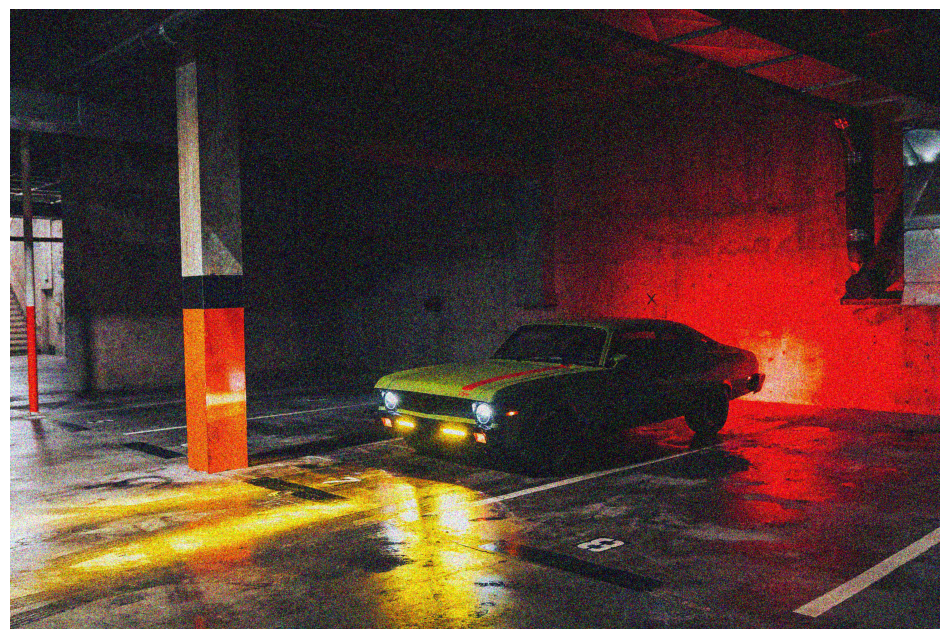

In [4]:
plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(noisy_image)
plt.show()

In [5]:
cv2.imwrite('noisy_image.jpg', noisy_image)

True

In [6]:
kernel_size = (9,9)
filter_image = cv2.blur(noisy_image, kernel_size)

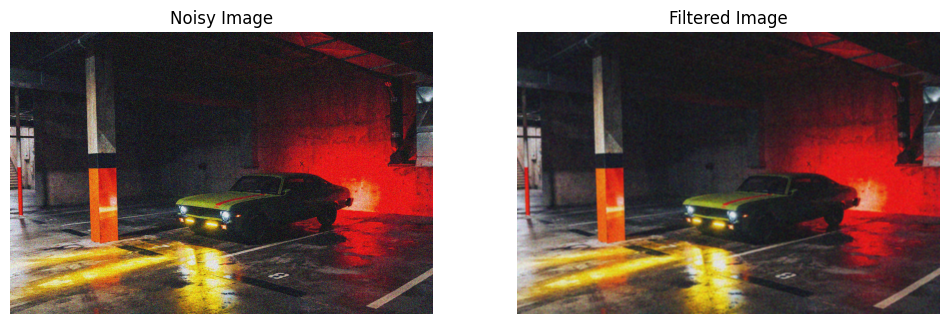

In [7]:
plt.figure(figsize=(12,10))

plt.subplot(1,2,1)
plt.title("Noisy Image")
plt.axis('off')
plt.imshow(noisy_image, cmap='gray')

plt.subplot(1,2,2)
plt.title("Filtered Image")
plt.axis('off')
plt.imshow(filter_image, cmap='gray')

plt.show()

In [8]:
kernel_size = (15,15)
gaussian_blur = cv2.GaussianBlur(noisy_image, kernel_size, 0)

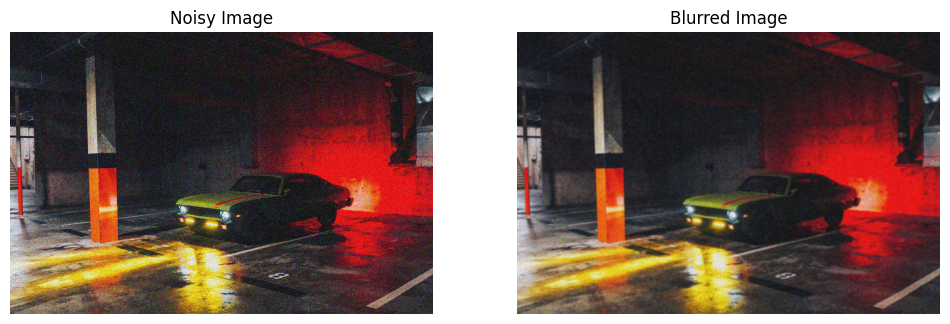

In [9]:
plt.figure(figsize=(12,10))

plt.subplot(1,2,1)
plt.title("Noisy Image")
plt.axis('off')
plt.imshow(noisy_image, cmap='gray')

plt.subplot(1,2,2)
plt.title("Blurred Image")
plt.axis('off')
plt.imshow(gaussian_blur, cmap='gray')

plt.show()

In [10]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]], dtype=np.float32)

In [11]:
sharpened_img = cv2.filter2D(noisy_image, -1, kernel)

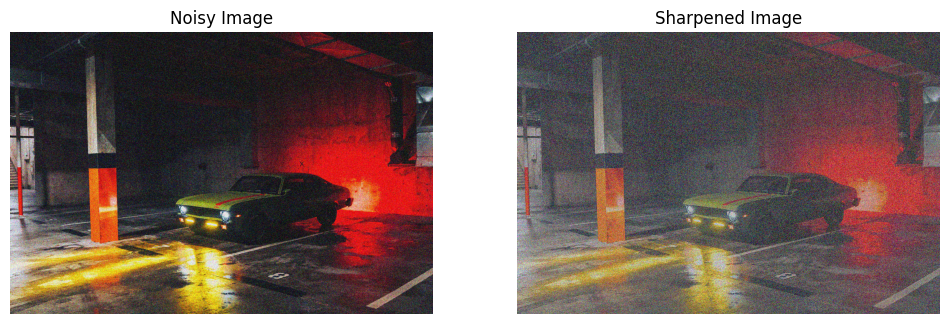

In [12]:
plt.figure(figsize=(12,10))

plt.subplot(1,2,1)
plt.title("Noisy Image")
plt.axis('off')
plt.imshow(noisy_image, cmap='gray')

plt.subplot(1,2,2)
plt.title("Sharpened Image")
plt.axis('off')
plt.imshow(sharpened_img, cmap='gray')

plt.show()

### USER DEFINED FUNCTION

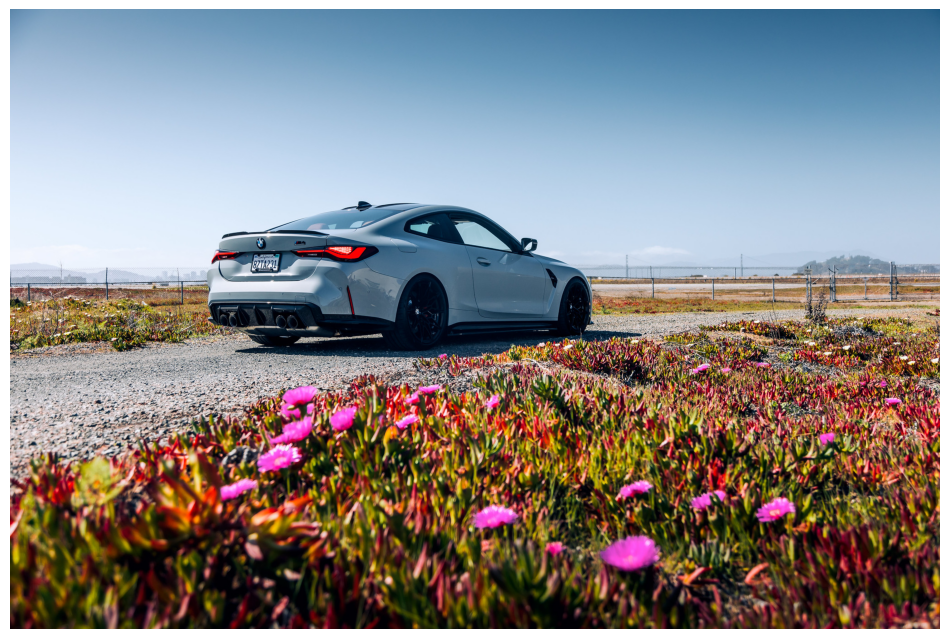

In [13]:
bmw = img.imread('bmw.jpg')

plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(bmw)


In [14]:
def gaussian_noise(bmw, mean = 0, sigma = 25):
    row, col, ch = bmw.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = bmw + gauss
    return np.clip(gauss, 0, 255).astype(np.uint8)

In [15]:
def average_filter(bmw, kernel_size = 3):
    row, col, ch = bmw.shape
    filtered_bmw = np.zeros((row, col, ch), dtype=np.uint8)
    pad_size = kernel_size // 2
    padded_bmw = cv2.copyMakeBorder(bmw, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT) 
    for  i in range(pad_size, row + pad_size):
        for j in range(pad_size, col + pad_size):
            roi = padded_bmw[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]
            filtered_bmw[i-pad_size, j-pad_size] = np.mean(roi)
    return filtered_bmw

In [16]:
def gausssian_blur (bmw, kernel_size = 20, sigma = 0 ):
    row, col, ch = bmw.shape
    filtered_bmw = np.zeros((row, col, ch), dtype=np.uint8)
    pad_size = kernel_size // 2
    padded_bmw = cv2.copyMakeBorder(bmw, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT) 
    kernel = np.zeros((kernel_size, kernel_size))
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - pad_size
            y = j - pad_size
            kernel[i , j] = np.exp(x **2 + y**2 )/ (2 * sigma**2)
    kernel /= np.sum(kernel)
    for i in range (pad_size, row + pad_size):
        for j in range(pad_size, col + pad_size):
            roi = padded_bmw[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1, :]
            for c in range (ch):
                filtered_bmw[i- pad_size , j - pad_size, c] = np.sum(roi [:, : , c] * kernel )
    return filtered_bmw


In [19]:
def sharpening_filter(bmw):
    row, col = bmw.shape[:2]
    filtered_bmw = np.zeros_like(bmw, dtype=np.int32)
    pad_size = 1
    padded_bmw = cv2.copyMakeBorder(bmw, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
    for i in range(pad_size, row + pad_size):
        for j in range(pad_size, col + pad_size):
            roi = padded_bmw[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
            for c in range(bmw.shape[2]):
                filtered_bmw[i - pad_size, j - pad_size, c] = np.sum(roi[:, :, c] * kernel)
    return np.clip(filtered_bmw, 0, 255).astype(np.uint8)

In [20]:
bmw_noisy_image = gaussian_noise(bmw)

bmw_filtered_img = average_filter(bmw_noisy_image)

bmw_gaussian_blur = gausssian_blur(bmw, kernel_size= 5, sigma= 1)

bmw_sharpened_img = sharpening_filter(bmw)

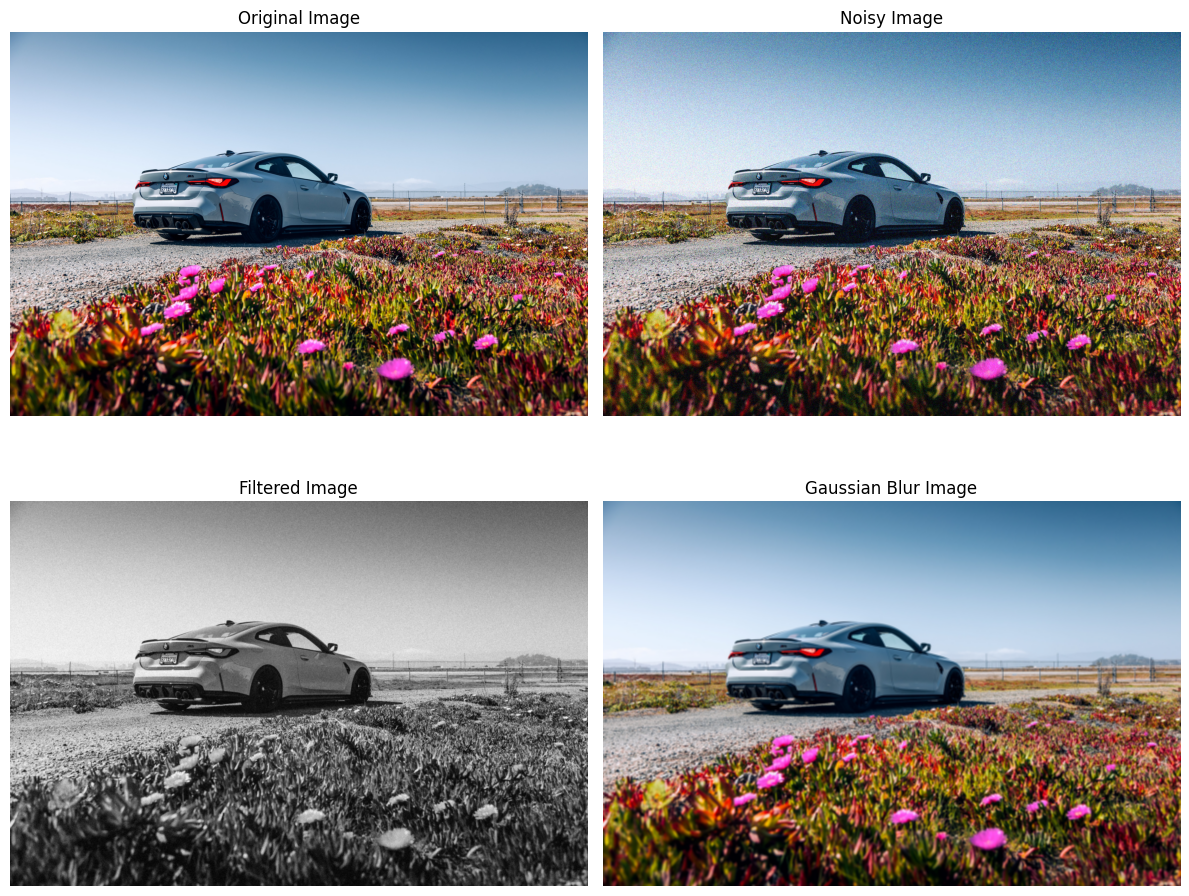

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(bmw)
plt.title('Original Image')
plt.axis('off')

# Noisy image
plt.subplot(2, 2, 2)
plt.imshow(bmw_noisy_image)
plt.title('Noisy Image')
plt.axis('off')

# Filtered image
plt.subplot(2, 2, 3)
plt.imshow(bmw_filtered_img)
plt.title('Filtered Image')
plt.axis('off')


plt.subplot(2, 2, 4)
plt.imshow(bmw_gaussian_blur)
plt.title('Gaussian Blur Image')
plt.axis('off')

plt.tight_layout()
plt.show()
